# CO2 EMISSION PREDICTION

## Table of Content
1. [Problem Statement](#Problem-Statement) \
2. [Data Source and Overview](#Data-Source-and-Overview) \
3. [Project Objective](#Project-Objective) \
1. [Data importation](#1.Data-gathering-and-cleaning) \
2. [Data cleaning and Feature engineering](#2.Data-cleaning-and-Feature-engineering) \
3. [Exploratory data analysis](#3.Exploratory-data-analysis) \
4. [Building of Models](#4.Building-of-Models)
5. [Model Evaluation](#5.Model-Evaluation-and-Comparison) \
6. [Model selection](#6.Implementing-the-best-Best-model-with-test-data) \
7. [Feature importance](#7.Feature-Importance) \
8. [Summary](#8.Summary)

## 1. Problem Statement
- With the growing concern over climate change and its impacts, reducing CO2 emissions from vehicles has become a critical focus for policymakers, manufacturers, and consumers alike.
- Vehicles are a significant source of CO2 emissions, and understanding the factors that contribute to these emissions is essential for developing strategies to mitigate their environmental impact.
- This project utilizes a dataset from the Canada Government's official open data website, which provides detailed information on vehicle CO2 emissions along with various features of the vehicles.
- We will employ regression analysis techniques on the provided dataset to provide valuable insights that can inform policies and strategies to reduce the environmental impact of transportation.

## 2. Data Source and Overview
- In this project, we use a dataset of CO2 emissions by vehicle released by the Canadian Government.
- The Canadian Government made their dataset publicly available online (https://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64#wb-auto-6),
making it freely accessible to the scientific community.
- Dataset was obtained from Kaggle, an open source data website (https://www.kaggle.com/datasets/debajyotipodder/co2-emission-by-vehicles).
- Dataset contains data over a period of 7 years.
- There are total 7385 rows and 12 columns.
- There are few abbreviations that has been used to describe the features, listed below;
- Model \
4WD/4X4 = Four-wheel drive \
AWD = All-wheel drive     
FFV = Flexible-fuel vehicle   
SWB = Short wheelbase   
LWB = Long wheelbase   
EWB = Extended wheelbase   

- Transmission   
A = Automatic   
AM = Automated manual  
AS = Automatic with select shift  
AV = Continuously variable  
M = Manual  
3 - 10 = Number of gears  

- Fuel type \
X = Regular gasoline   
Z = Premium gasoline   
D = Diesel
E = Ethanol (E85)  
N = Natural gas   

- City and highway fuel consumption ratings are shown in litres per 100 kilometres (L/100 km) - the combined rating (55% city, 45% hwy) is shown in L/100 km and in miles per gallon (mpg).
- The tailpipe emissions of carbon dioxide (in grams per kilometre) for combined city and highway driving.

## 3. Project Objective
- Determine or test the influence of different variables on the emission of CO2.
- Identify the most influencing features that affect the CO2 emission the most.


## 4. Data Importation

In [2]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import xgboost

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline


from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor


from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 5. Data cleaning

In [4]:
co2 = pd.read_csv('/content/drive/MyDrive/co2_emission/CO2 Emissions_Canada.csv')

In [5]:
co2.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [6]:
co2.shape

(7385, 12)

In [7]:
co2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [8]:
co2.isna().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

The data has no missing values

In [9]:
co2.duplicated().sum()

1103

There are 1103 duplicated rows in the dataset

In [10]:
co2[co2.duplicated()]

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
1075,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
1076,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
1081,ALFA ROMEO,4C,TWO-SEATER,1.8,4,AM6,Z,9.7,6.9,8.4,34,193
1082,ASTON MARTIN,DB9,MINICOMPACT,5.9,12,A6,Z,18.0,12.6,15.6,18,359
1084,ASTON MARTIN,V8 VANTAGE,TWO-SEATER,4.7,8,AM7,Z,17.4,11.3,14.7,19,338
...,...,...,...,...,...,...,...,...,...,...,...,...
7356,TOYOTA,Tundra,PICKUP TRUCK - STANDARD,5.7,8,AS6,X,17.7,13.6,15.9,18,371
7365,VOLKSWAGEN,Golf GTI,COMPACT,2.0,4,M6,X,9.8,7.3,8.7,32,203
7366,VOLKSWAGEN,Jetta,COMPACT,1.4,4,AS8,X,7.8,5.9,7.0,40,162
7367,VOLKSWAGEN,Jetta,COMPACT,1.4,4,M6,X,7.9,5.9,7.0,40,163


In [11]:
co2.drop_duplicates(inplace=True)

The duplicated rows were dropped

In [12]:
co2.shape

(6282, 12)

In [13]:
num_var=co2.select_dtypes(np.number)
cat_var= co2.select_dtypes(include='object')

In [14]:
num_var.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,6282.000000,6282.000000,6282.000000,6282.000000,6282.000000,6282.000000,6282.000000
mean,3.161812,5.618911,12.610220,9.070583,11.017876,27.411016,251.157752
std,1.365201,1.846250,3.553066,2.278884,2.946876,7.245318,59.290426
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.700000,10.300000,12.700000,32.000000,289.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


Above is the summary of the numerical variables in the dataset

## 6. Exploratory Data Analysis

In [15]:
def cat_insp(var):
    print(co2[var].value_counts(normalize=True))

def cat_plot(var, order):
    sns.countplot(x=var, order=order, color= 'darkseagreen',data=co2)
    total = len(co2)
    for p in plt.gca().patches:
        height = p.get_height()
        plt.text(p.get_x() + p.get_width() / 2., height + 0.2, f'{height / total:.2%}', ha="center")

def num_plot(var):
    fig, ax=plt.subplots(1,2, figsize=(8, 4))
    sns.histplot(x=var,kde=True, data=num_var, color='darkseagreen', ax=ax[0])
    sns.boxplot(x=var, data=num_var, ax=ax[1])

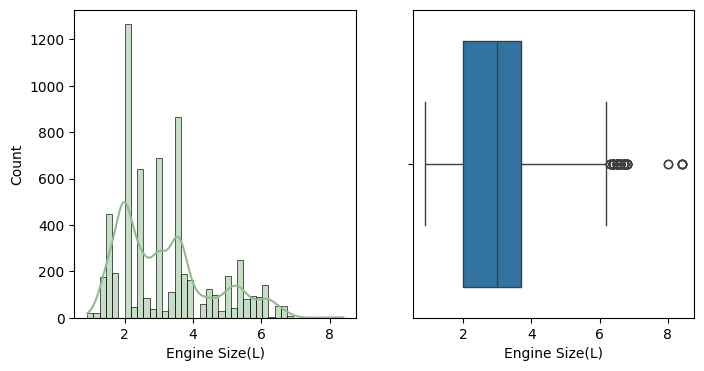

In [16]:
num_plot('Engine Size(L)')

Upon examining the Engine Size(L)variable, it is evident that the plot is skewed to the right, and there are quiet a number of outliers.

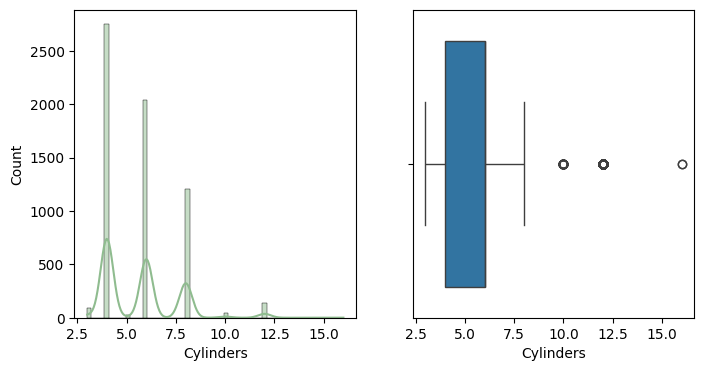

In [17]:
num_plot('Cylinders')

From the observation above, the plot is skewed to the right and we can also observed that there are a few outliers in the Cylinders column.

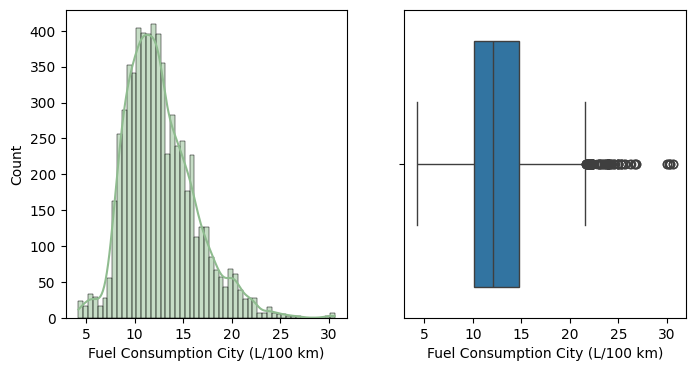

In [18]:
num_plot('Fuel Consumption City (L/100 km)')

 The distribution of the Fuel Consumption City (L/100 km) variable is not heavily skewed towards the right, but there are numerous outliers present in the data. This implies that the data is not evenly distributed.

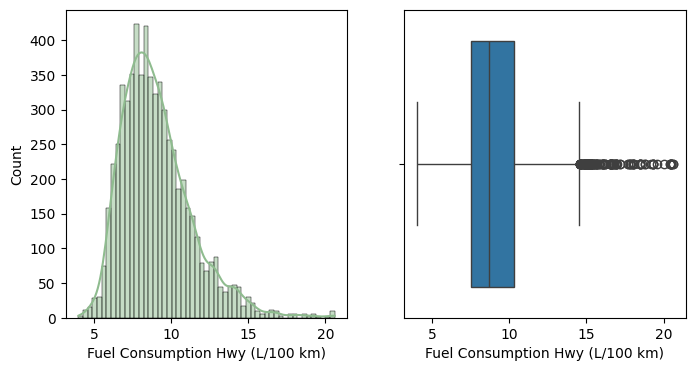

In [19]:
num_plot('Fuel Consumption Hwy (L/100 km)')

Upon examining the Fuel Consumption Hwy (L/100 km) variable, it is observed that the plot is slightly skewed to the right, resembling a normal distribution. However, there are many data points that deviate significantly from the majority, indicating the presence of numerous outliers.

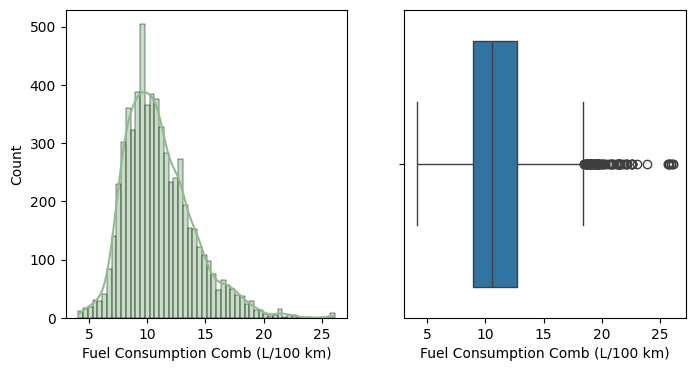

In [20]:
num_plot('Fuel Consumption Comb (L/100 km)')

After analyzing the Fuel Consumption Hwy (L/100 km) variable, it is evident that the distribution is slightly skewed to the right, which indicate values extending beyond 25 km. However, there are numerous data points that deviate significantly from the majority, indicating the presence of many outliers.

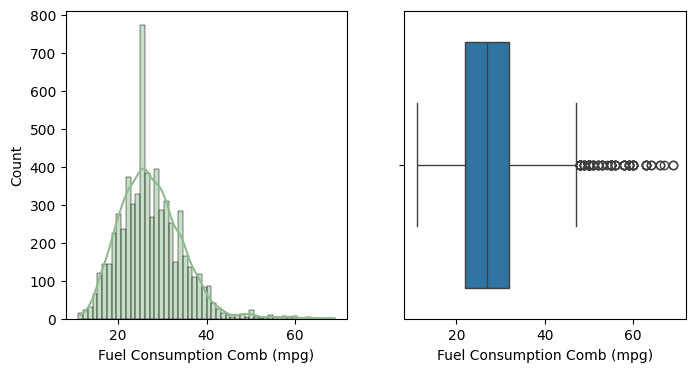

In [21]:
num_plot('Fuel Consumption Comb (mpg)')

Regarding the Fuel Consumption Comb (mpg) variable, the plotted data exhibits a shape reminiscent of a bell curve, which is typical of a normal distribution. However, within this distribution, there are several data points that stray significantly from the majority, indicating the presence of numerous outlier values. While the overall distribution may resemble a normal curve, the existence of these outliers suggests that the data for this variable lacks an even spread or balanced representation across all values.

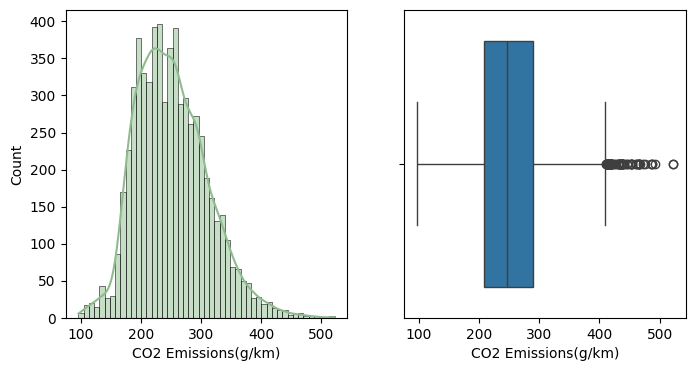

In [22]:
num_plot('CO2 Emissions(g/km)')

The plot reveals that the CO2 Emissions(g/km) variable follows a normal distribution and contains quiet a number of outlying values.

In [23]:
for i in cat_var.columns:
    cat_insp(i)

Make
FORD             0.091850
CHEVROLET        0.081980
BMW              0.079752
MERCEDES-BENZ    0.058103
PORSCHE          0.047119
GMC              0.046004
TOYOTA           0.043935
AUDI             0.041866
NISSAN           0.033906
MINI             0.031837
JEEP             0.031837
KIA              0.030564
VOLKSWAGEN       0.029768
HYUNDAI          0.029290
DODGE            0.028653
HONDA            0.026106
CADILLAC         0.022445
LEXUS            0.020535
MAZDA            0.020216
SUBARU           0.018943
JAGUAR           0.018784
VOLVO            0.018784
BUICK            0.014645
INFINITI         0.013849
LINCOLN          0.012894
LAND ROVER       0.012098
MITSUBISHI       0.011621
RAM              0.011461
CHRYSLER         0.010188
FIAT             0.008914
MASERATI         0.008278
ACURA            0.008118
ROLLS-ROYCE      0.007641
ASTON MARTIN     0.006208
LAMBORGHINI      0.005890
BENTLEY          0.005571
SCION            0.003343
ALFA ROMEO       0.003025
GENESIS

([], [])

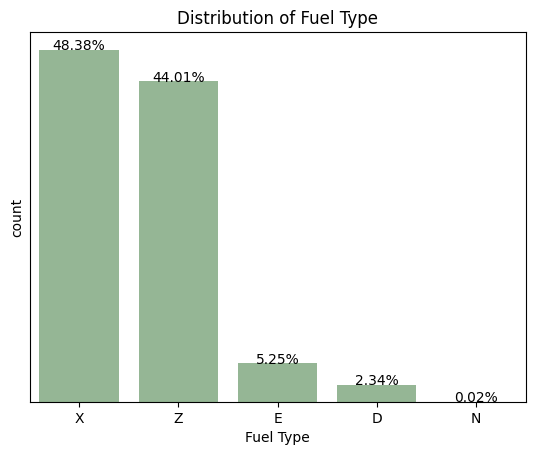

In [24]:
ftorder=co2['Fuel Type'].value_counts().sort_values(ascending=False).index
cat_plot('Fuel Type',ftorder)
plt.title('Distribution of Fuel Type')
plt.yticks([])

**Observation:**

Regular gasoline(X) is the highest fuel type compared to other fuel types.

Premium gasoline(Z) follows (X) in terms of fuel types, though it is significantly lower than the (X)

(D) Diesel ,(E) Ethanol  and (N) Natural gas are relatively the lowest fuel types

This shows that theres  a clear distinction in the fuel types.

Regular gasoline(X) and Premium gasoline(Z) are the highest fuel type compared to other fuel types.

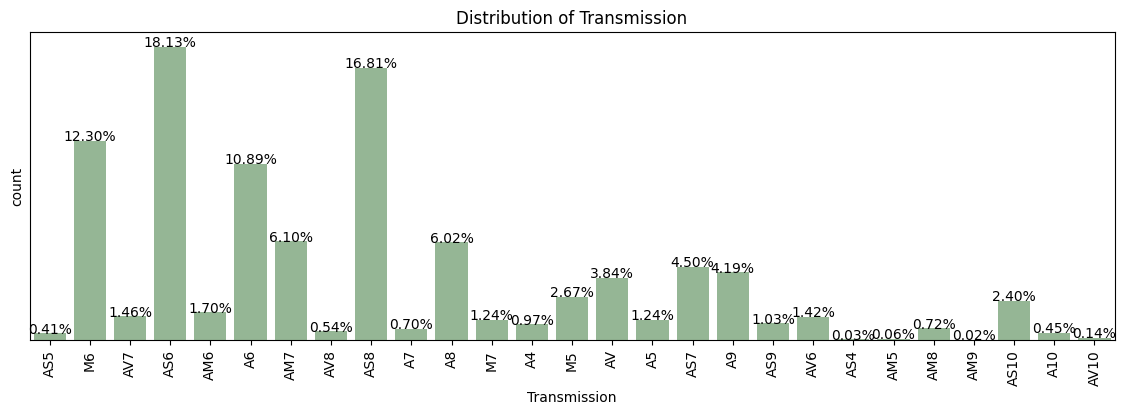

In [25]:
plt.figure(figsize=(14,4))
cat_plot('Transmission', None)
plt.xticks(rotation=90)
plt.title('Distribution of Transmission')
plt.yticks([])
plt.show()

The highest frequency of the transmission is the AM6, which accounts for 18.13% of the data while the least occurring transmission is AM9 with 0.02%

The transmission types can be proudly categorized into five groups:A,AS,AV,AM and M

In [26]:
co2['Transmission'] = np.where(co2['Transmission'].str.startswith('AS'), 'AS',
                        np.where(co2['Transmission'].str.startswith('M'), 'M',
                        np.where(co2['Transmission'].str.startswith('AV'), 'AV',
                        np.where(co2['Transmission'].str.startswith('AM'), 'AM',
                        np.where(co2['Transmission'].str.startswith('A'), 'A',
                               co2['Transmission'])
                        )
                        )
                        )
)

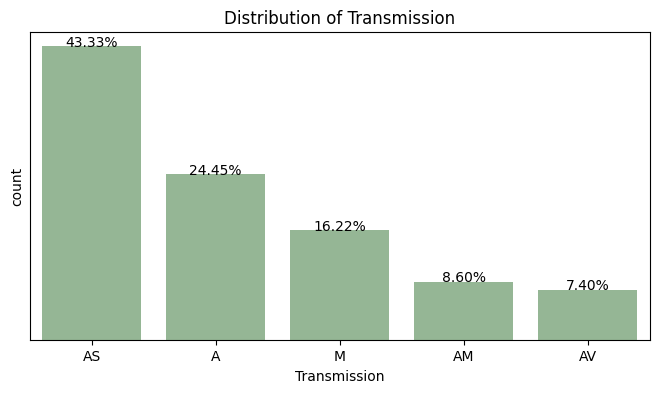

In [27]:
torder=co2['Transmission'].value_counts().sort_values(ascending=False).index
plt.figure(figsize=(8,4))
cat_plot('Transmission', torder)
plt.title('Distribution of Transmission')
plt.yticks([])
plt.show()

**Observation:**

"Automatic Semi-Automatic" (AS) has the highest transmission compared to others.

"Automatic" (A) follows (AS) in terms of highest transmissions, though it is significantly lower than the (AS)

"Manual" (M) is the third highest transimission

 "Automatic Manual" (AM) and  "Automatic V" (AV) are relatively the lowest transmissions.

The observation regarding transmissions highlights a distinct and well-defined difference or variation among the various transmission types..

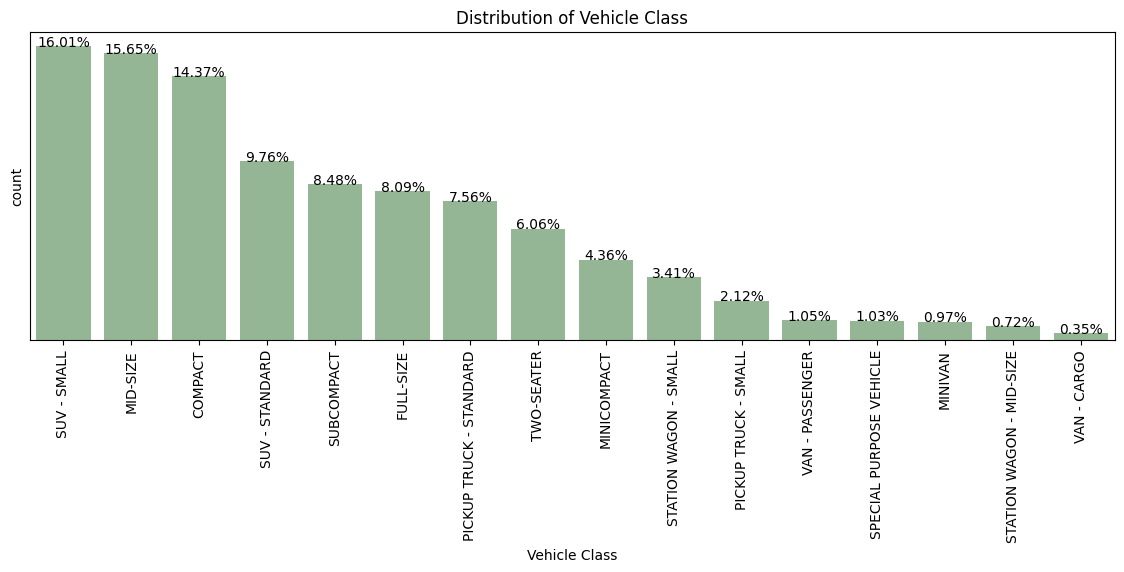

In [28]:
vcorder=co2['Vehicle Class'].value_counts().sort_values(ascending=False).index
plt.figure(figsize=(14,4))
cat_plot('Vehicle Class', vcorder)
plt.xticks(rotation=90)
plt.title('Distribution of Vehicle Class')
plt.yticks([])
plt.show()

**Observations:**

The vehicle class "SUV-Small" has the highest representation or frequency among all the classes observed, outweighing the other categories. In contrast, the "VAN-CARGO" class exhibits the lowest occurrence or count compared to the rest of the vehicle classes under consideration.

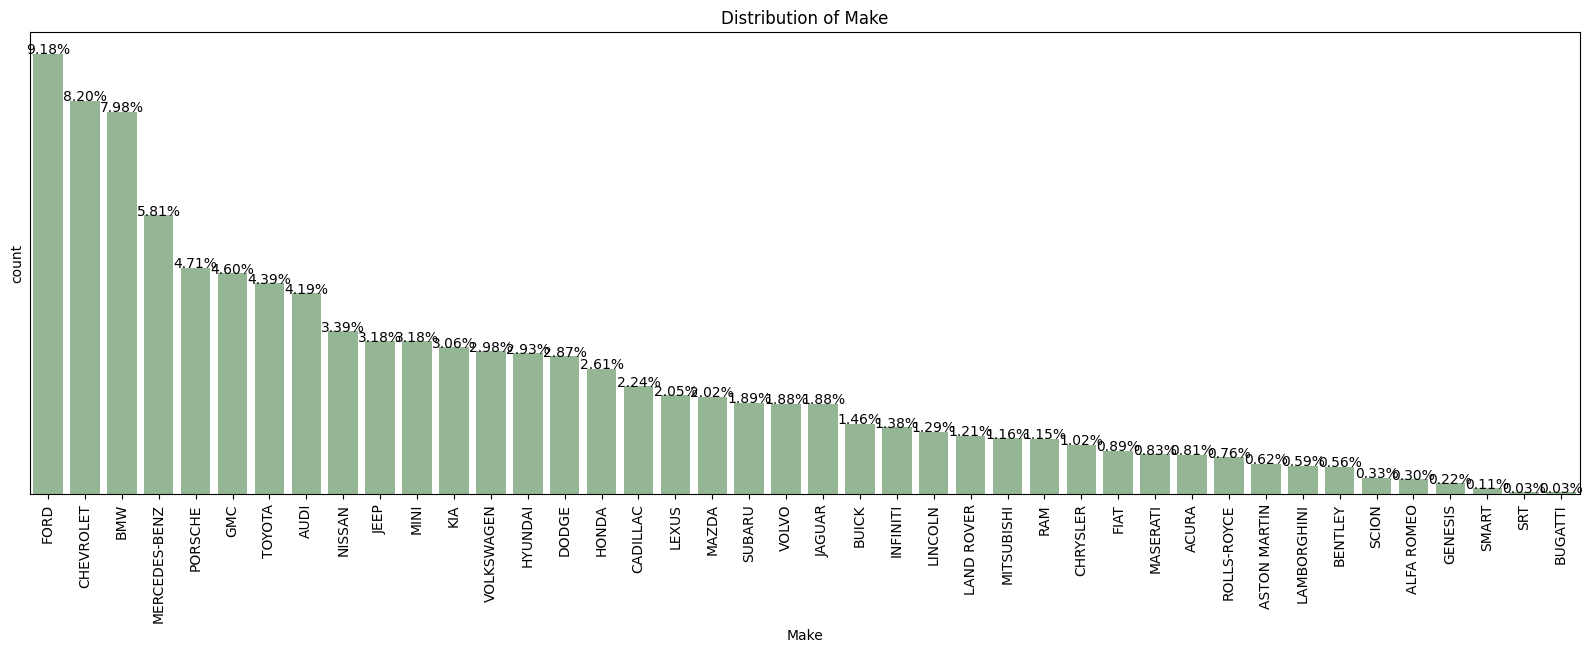

In [29]:
maorder=co2['Make'].value_counts().sort_values(ascending=False).index
plt.figure(figsize=(20,6))
cat_plot('Make', maorder)
plt.xticks(rotation=90)
plt.title('Distribution of Make')
plt.yticks([])
plt.show()

Based on the **observation** mentioned, when it comes to the distribution of vehicle makes, Ford has the highest frequency or dominates the dataset in comparison to other manufacturers. On the other hand, Bugatti appears to have the lowest representation or occurrence among all the makes present in the dataset.

Text(0.5, 1.0, 'Fuel Type vs CO2 Emissions')

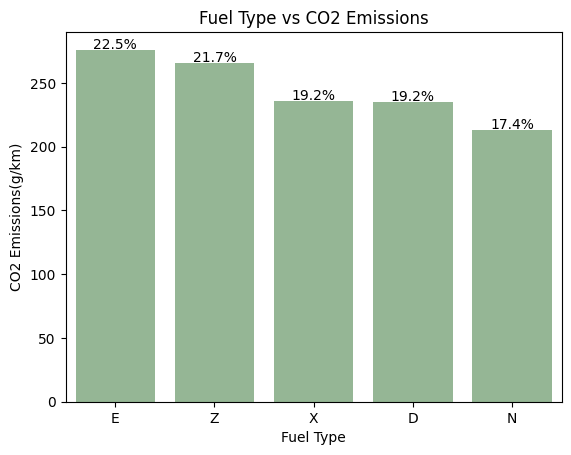

In [30]:
fteorder= co2.groupby('Fuel Type')[['CO2 Emissions(g/km)']].mean().sort_values(by='CO2 Emissions(g/km)',ascending=False)
sns.barplot(x='Fuel Type', y='CO2 Emissions(g/km)', data=co2,color='darkseagreen', order=fteorder.index, errorbar=None)
for index, value in enumerate(fteorder['CO2 Emissions(g/km)']):
    plt.text(index, value + 1, '{:.1f}%'.format((value / fteorder['CO2 Emissions(g/km)'].sum()) * 100), ha='center')
plt.title('Fuel Type vs CO2 Emissions')

**Observations:**

Based on the analysis of fuel types and their corresponding CO2 emissions, it is evident that vehicles running on Ethanol (denoted as 'E') exhibit the highest levels of carbon dioxide emissions. Following closely behind are vehicles that utilize Premium gasoline('Z'), and in last place are vehicles using Natural Gas ('N'), with the lowest CO2 emissions.

Text(0.5, 1.0, 'Transmission vs CO2 Emissions')

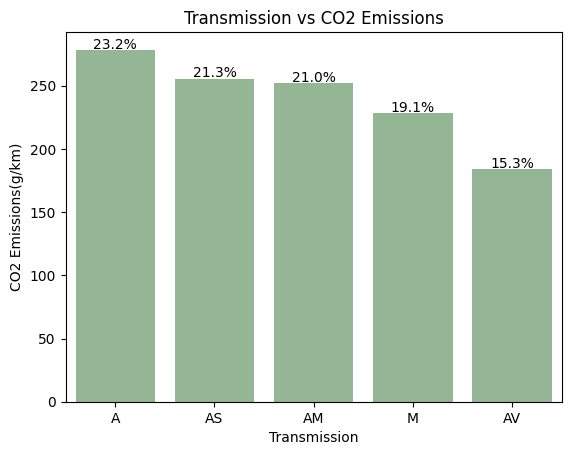

In [31]:
teorder= co2.groupby('Transmission')[['CO2 Emissions(g/km)']].mean().sort_values(by='CO2 Emissions(g/km)',ascending=False)
sns.barplot(x='Transmission', y='CO2 Emissions(g/km)', data=co2, color='darkseagreen', order=teorder.index, errorbar=None)
for index, value in enumerate(teorder['CO2 Emissions(g/km)']):
    plt.text(index, value + 1, '{:.1f}%'.format((value / teorder['CO2 Emissions(g/km)'].sum()) * 100), ha='center')
plt.title('Transmission vs CO2 Emissions')

**Observations**

Upon analyzing the relationship between transmission types and CO2 emissions, it is evident that vehicles with "Automatic" transmission have the highest levels of emissions. The emissions from vehicles with "Automatic Semi-Automatic" (AS) and "Automatic Manual" (AM) transmissions are almost comparable, with the former being slightly higher by approximately 3%. Vehicles with "Manual" (M) transmission occupy the fourth position in terms of emission levels, while those with "Automatic V" (AV) transmission exhibit the lowest CO2 emissions among all the transmission categories considered.

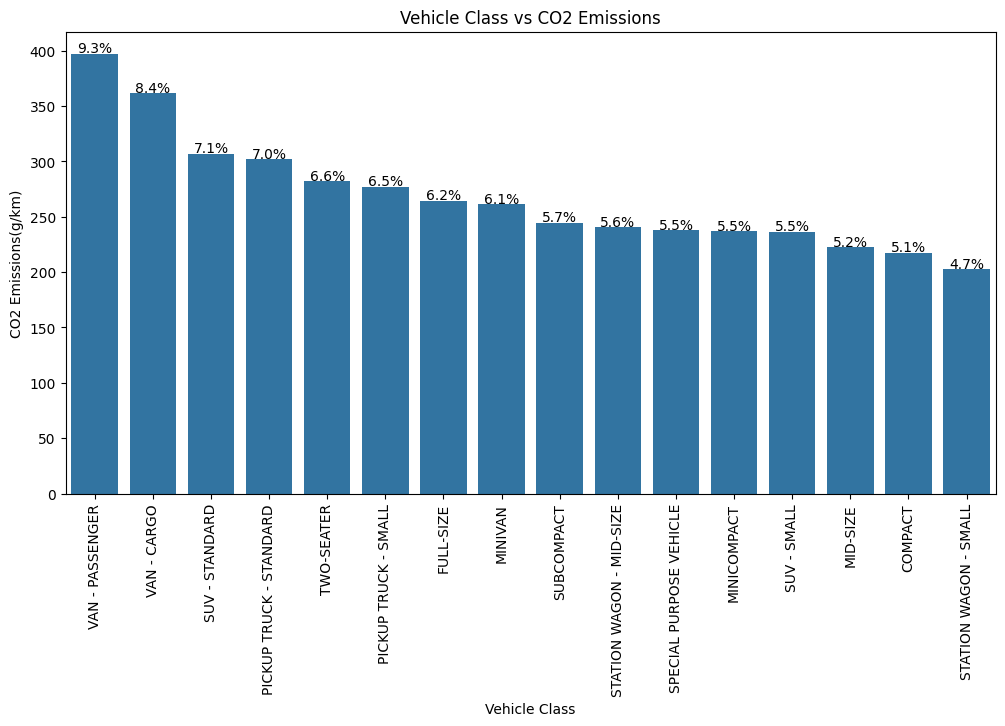

In [32]:
vceorder= co2.groupby('Vehicle Class')[['CO2 Emissions(g/km)']].mean().sort_values(by='CO2 Emissions(g/km)',ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(x='Vehicle Class', y='CO2 Emissions(g/km)', data=co2, order=vceorder.index, errorbar=None)
for index, value in enumerate(vceorder['CO2 Emissions(g/km)']):
    plt.text(index, value + 1, '{:.1f}%'.format((value / vceorder['CO2 Emissions(g/km)'].sum()) * 100), ha='center')
plt.title('Vehicle Class vs CO2 Emissions')
plt.xticks(rotation=90)
plt.show()

**Observation;**

When evaluating the relationship between vehicle class and carbon dioxide emissions, the analysis reveals that the "VAN-PASSENGER" category stands out as the highest contributor to CO2 emissions among all classes examined. Following closely behind is the "VAN-CARGO" class, which ranks as the second-highest emitter. In contrast, the "STATION WAGON - SMALL" class emerges as the category with the lowest CO2 emission levels, significantly lower than the rest of the vehicle classes under consideration.

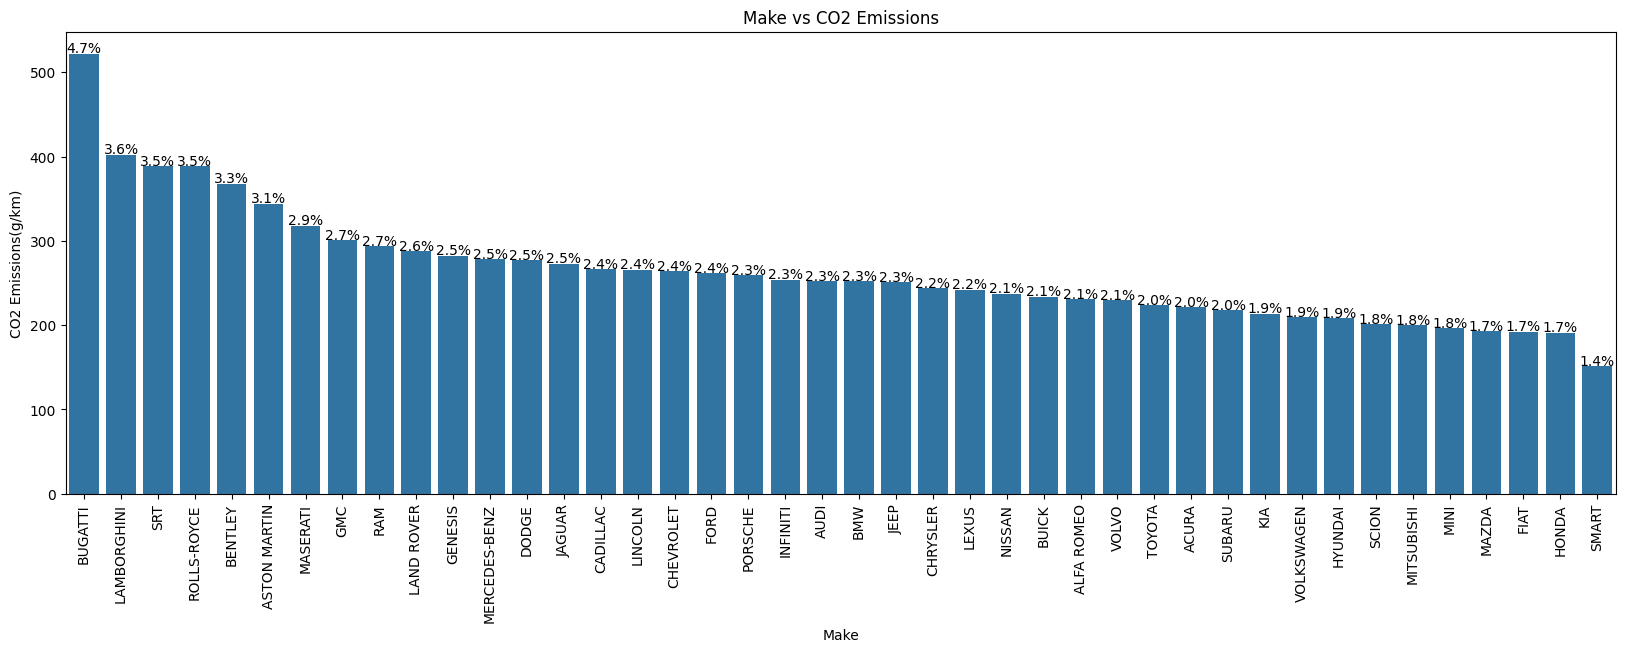

In [33]:
maeorder= co2.groupby('Make')[['CO2 Emissions(g/km)']].mean().sort_values(by='CO2 Emissions(g/km)',ascending=False)
plt.figure(figsize=(20,6))
sns.barplot(x='Make', y='CO2 Emissions(g/km)', data=co2, order=maeorder.index, errorbar=None)
for index, value in enumerate(maeorder['CO2 Emissions(g/km)']):
    plt.text(index, value + 1, '{:.1f}%'.format((value / maeorder['CO2 Emissions(g/km)'].sum()) * 100), ha='center')
plt.title('Make vs CO2 Emissions')
plt.xticks(rotation=90)
plt.show()

It is observed that though Bugatti is the make with the highest CO2 emissions(4.7%), there is not much variance in the CO2 emissions of the other makes.

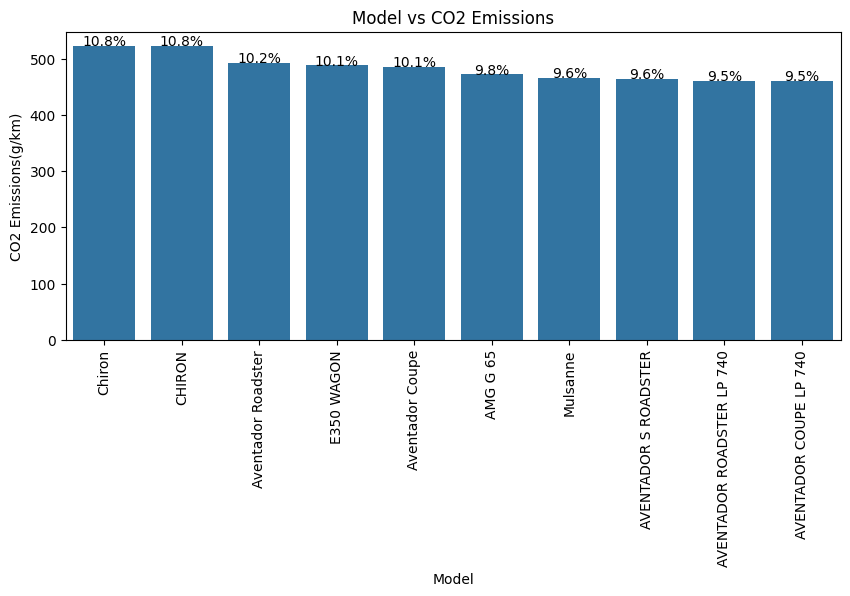

In [34]:
moeorder= co2.groupby('Model')[['CO2 Emissions(g/km)']].mean().sort_values(by='CO2 Emissions(g/km)',ascending=False).head(10)
plt.figure(figsize=(10,4))
sns.barplot(x='Model', y='CO2 Emissions(g/km)', data=moeorder, order=moeorder.index, errorbar=None)
for index, value in enumerate(moeorder['CO2 Emissions(g/km)']):
    plt.text(index, value + 1, '{:.1f}%'.format((value / moeorder['CO2 Emissions(g/km)'].sum()) * 100), ha='center')
plt.title('Model vs CO2 Emissions')
plt.xticks(rotation=90)
plt.show()

This graph shows the top ten models with highest CO2 emissions. Chiron has the highest with 10.8% and the rest of the nine follow closely behind, without significant variation.

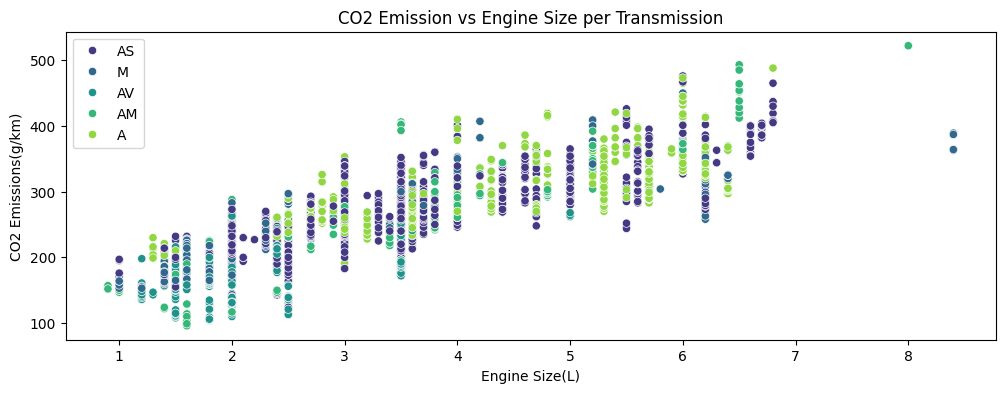

In [35]:
plt.figure(figsize=(12,4))
sns.scatterplot(x='Engine Size(L)', y='CO2 Emissions(g/km)', hue='Transmission',palette='viridis', data=co2)
plt.title('CO2 Emission vs Engine Size per Transmission')
plt.legend(loc='best')

This graph shows the positive relationship between engine size and CO2 emissions.

Apart from the AV transmission that seems to be clustered at the bottom(showing low CO2 emisssions), all the other transmissions are spread across from lowest to highest.

This shows that transmission type does not play a significant role in the CO2 emissions for this dataset.

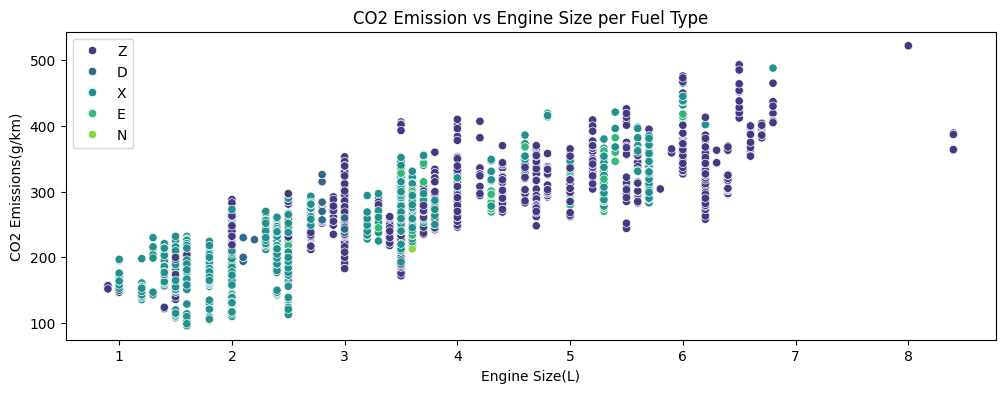

In [36]:
plt.figure(figsize=(12,4))
sns.scatterplot(x='Engine Size(L)', y='CO2 Emissions(g/km)', palette='viridis',hue='Fuel Type', data=co2)
plt.title('CO2 Emission vs Engine Size per Fuel Type')
plt.legend(loc='best')

This graph aslo shows a positive relationship between  CO2 emissions and engine size.

It is observed that the Regular gasoline fuel type is clustered at the bottom, Regular gasoline is spread across but has majority is the in upper parts of the graph. Since there is some sort of clustering, we see that there is a weak relationship between fuel type and CO2 emissions.

## Heatmap to detect correlation

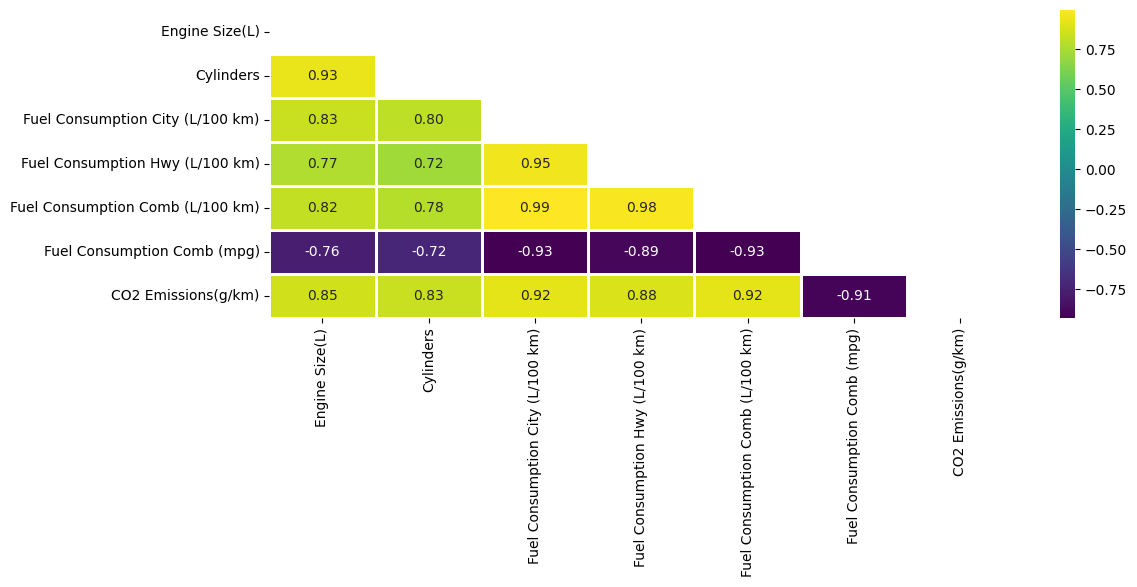

In [37]:
cor=num_var.corr()
plt.figure(figsize=(12,4))

mask = np.triu(np.ones_like(cor,dtype=bool))


sns.heatmap(cor,annot = cor,mask=mask,
            cmap = 'viridis',linewidth=1,
            fmt=".2f")
plt.show()

This heatmap map quantifies the correlation between the numerical variables, where the highest is 1 and -1(showing an inverse correlation) and the lowest is 0.

It is seen that the fuel consumption variations have very high correlations with one another. In order to satisfy the assumption that there should not be mulitcollinearity, 'Fuel Consumption Comb(L/100 km)' which has the highest correlation to the target variable(CO2 emissions) will be picked while other similar columns will be dropped.

## One hot encoding

In [38]:
co2 = pd.get_dummies(co2, columns = ['Fuel Type'], drop_first=True)

In [39]:
co2.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),Fuel Type_E,Fuel Type_N,Fuel Type_X,Fuel Type_Z
0,ACURA,ILX,COMPACT,2.0,4,AS,9.9,6.7,8.5,33,196,False,False,False,True
1,ACURA,ILX,COMPACT,2.4,4,M,11.2,7.7,9.6,29,221,False,False,False,True
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV,6.0,5.8,5.9,48,136,False,False,False,True
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS,12.7,9.1,11.1,25,255,False,False,False,True
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS,12.1,8.7,10.6,27,244,False,False,False,True


In [40]:
co2[['Fuel Type_X', 'Fuel Type_Z','Fuel Type_E', 'Fuel Type_N']]=co2[['Fuel Type_X', 'Fuel Type_Z','Fuel Type_E', 'Fuel Type_N']].astype(int)

The categorical variables which be later used in the model building were converted into binary to allow for machine learning.

In [41]:
co2.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),Fuel Type_E,Fuel Type_N,Fuel Type_X,Fuel Type_Z
0,ACURA,ILX,COMPACT,2.0,4,AS,9.9,6.7,8.5,33,196,0,0,0,1
1,ACURA,ILX,COMPACT,2.4,4,M,11.2,7.7,9.6,29,221,0,0,0,1
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV,6.0,5.8,5.9,48,136,0,0,0,1
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS,12.7,9.1,11.1,25,255,0,0,0,1
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS,12.1,8.7,10.6,27,244,0,0,0,1


In [42]:
co2.shape

(6282, 15)

## 7. Building the Models

In [43]:
X= co2.drop(['Make',	'Model','Transmission','Vehicle Class','CO2 Emissions(g/km)','Fuel Consumption City (L/100 km)','Fuel Consumption Hwy (L/100 km)','Fuel Consumption Comb (mpg)'], axis=1)
y= co2['CO2 Emissions(g/km)']

In [44]:
X_train, X_test, y_train, y_test= train_test_split(X, y, random_state=42, test_size=0.25)

## Linear Regression

In [45]:
lr=LinearRegression()

lr.fit(X_train, y_train)
lr_pred=lr.predict(X_test)

print('Train score {:.2f}'.format(lr.score(X_train,y_train)))
print('Test score {:.2f}'.format(lr.score(X_test,y_test)))


Train score 0.99
Test score 0.99


In [46]:
lasso=Lasso()

lasso.fit(X_train, y_train)

print('Train score {:.2f}'.format(lasso.score(X_train,y_train)))
print('Test score {:.2f}'.format(lasso.score(X_test,y_test)))

Train score 0.98
Test score 0.97


In [47]:
lasso=Lasso()
param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100],
    'max_iter': [1000, 5000, 10000]
    }
lasso_gr = GridSearchCV(estimator=lasso, param_grid=param_grid, cv=5, scoring='r2')

lasso_gr.fit(X_train, y_train)

print('Best crossval score {:.2f}'.format(lasso_gr.best_score_))
print('Best parameters ',lasso_gr.best_params_)

Best crossval score 0.99
Best parameters  {'alpha': 0.01, 'max_iter': 1000}


In [48]:
lasso=Lasso(alpha=0.01, max_iter=1000)

lasso.fit(X_train, y_train)
lasso_pred=lasso.predict(X_test)

print('Train score {:.3f}'.format(lasso.score(X_train,y_train)))
print('Test score {:.3f}'.format(lasso.score(X_test,y_test)))

Train score 0.991
Test score 0.987


## Random Forest Regressor

In [49]:
rfr = RandomForestRegressor(random_state = 0)
rfr.fit(X_train,y_train)
print('train score: {:.2f}'.format(rfr.score(X_train,y_train)))
print('test score: {:.2f}'.format(rfr.score(X_test,y_test)))

train score: 1.00
test score: 1.00


In [50]:
rfr = RandomForestRegressor(random_state = 0)
param_grid = {'max_depth': [1,2,3,4,5,6,7,8,9,10],
              'n_estimators': [1,2,3,4,5,6,7,8,9,10]\
              ,'min_samples_split': [2,3,4,5,6,7,8,9,10],
              'max_leaf_nodes': [2,3,4,5,6,7,8,9,10]}

rand_rfr = GridSearchCV(rfr, param_grid,cv =5, error_score='raise', scoring= 'r2')

rand_rfr.fit(X_train,y_train)

print('Best crossval score {:.2f}'.format(rand_rfr.best_score_))
print('Best parameters:',rand_rfr.best_params_)

Best crossval score 0.96
Best parameters: {'max_depth': 5, 'max_leaf_nodes': 10, 'min_samples_split': 2, 'n_estimators': 10}


In [51]:
rfr = RandomForestRegressor(max_depth= 5, max_leaf_nodes= 10,
                             min_samples_split= 2, n_estimators= 10,
                             random_state=0)
rfr.fit(X_train,y_train)
rfr_pred=rfr.predict(X_test)

print('train score: {:.2f}'.format(rfr.score(X_train,y_train)))
print('test score: {:.2f}'.format(rfr.score(X_test,y_test)))

train score: 0.95
test score: 0.94


## Gradient Boost

In [52]:
gb=GradientBoostingRegressor()

gb.fit(X_train,y_train)

print('Train score:{:.3f}'.format(gb.score(X_train,y_train)))
print('Test score: {:.3f}'.format(gb.score(X_test,y_test)))

Train score:0.997
Test score: 0.994


In [53]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5]
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=GradientBoostingRegressor(), param_grid=param_grid, cv=3, scoring='r2')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(f'Best Parameters: {best_params}')
print(f'Best Model: {best_model}')

Best Parameters: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 300}
Best Model: GradientBoostingRegressor(max_depth=4, n_estimators=300)


In [54]:
gb=GradientBoostingRegressor(learning_rate=0.1, max_depth=4, n_estimators=300)

gb.fit(X_train,y_train)
gb_pred=gb.predict(X_test)

print('Train score:{:.3f}'.format(gb.score(X_train,y_train)))
print('Test score: {:.3f}'.format(gb.score(X_test,y_test)))

Train score:0.998
Test score: 0.995


In [55]:
xgb=XGBRegressor()

xgb.fit(X_train,y_train)

print('Train score:{:.3f}'.format(xgb.score(X_train,y_train)))
print('Test score: {:.3f}'.format(xgb.score(X_test,y_test)))

Train score:0.999
Test score: 0.995


In [56]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'gamma':[0,0.001, 0.01,0.1,1]
}

# Initialize the GridSearchCV object
xgb_gs = RandomizedSearchCV(estimator=XGBRegressor(), param_distributions=param_grid, n_iter=2, cv=3, scoring='r2')

# Fit the grid search to the data
xgb_gs.fit(X_train, y_train)

# Get the best parameters and model
best_params = xgb_gs.best_params_
best_model = xgb_gs.best_estimator_

print(f'Best Parameters: {best_params}')


Best Parameters: {'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.1, 'gamma': 0}


In [57]:
xgb=XGBRegressor(gamma=0.1,learning_rate=0.1, max_depth=5, n_estimators=300)

xgb.fit(X_train,y_train)
xgb_pred=xgb.predict(X_test)

print('Train score:{:.3f}'.format(xgb.score(X_train,y_train)))
print('Test score: {:.3f}'.format(xgb.score(X_test,y_test)))

Train score:0.998
Test score: 0.996


# Model Evaluation

In [58]:
# 1.Linear regression
lr_train_score = lr.score(X_train,y_train)
lr_test_score = lr.score(X_test,y_test)
rmse_lr=mean_squared_error(y_test, lr_pred, squared=False)
mae_lr=mean_absolute_error(y_test, lr_pred)

# 2.Lasso
lasso_train_score = lasso.score(X_train,y_train)
lasso_test_score = lasso.score(X_test,y_test)
rmse_lasso=mean_squared_error(y_test, lasso_pred, squared=False)
mae_lasso=mean_absolute_error(y_test, lasso_pred)

# 3.Random Forest
rfr_train_score =rfr.score(X_train,y_train)
rfr_test_score=rfr.score(X_test,y_test)
rmse_rfr=mean_squared_error(y_test, rfr_pred, squared=False)
mae_rfr=mean_absolute_error(y_test, rfr_pred)

# 3.Gradient Boost
gb_train_score =gb.score(X_train,y_train)
gb_test_score =gb.score(X_test,y_test)
rmse_gb=mean_squared_error(y_test, gb_pred, squared=False)
mae_gb=mean_absolute_error(y_test, gb_pred)

# 5.XG Boost
xgb_train_score =xgb.score(X_train,y_train)
xgb_test_score=xgb.score(X_test,y_test)
rmse_xgb=mean_squared_error(y_test, xgb_pred, squared=False)
mae_xgb=mean_absolute_error(y_test, xgb_pred)



In [59]:
Model =['Linear Regression','Lasso','Random Forest','Gradient Boost',
        'XG Boost']

Train_rsq = [lr_train_score,lasso_train_score,
                  rfr_train_score,gb_train_score, xgb_train_score
                  ]

Test_rsq = [lr_test_score,lasso_test_score,
                  rfr_test_score,gb_test_score, xgb_test_score
                 ]

RMSE= [rmse_lr,rmse_lasso,
                  rmse_rfr,rmse_gb, rmse_xgb
                  ]

MAE=[mae_lr,mae_lasso,mae_rfr,mae_gb,mae_xgb]

In [60]:
eval_report=pd.DataFrame({'Model':Model,
                                        'Train Rsquared':Train_rsq,
                                        'Test Rsquared':Test_rsq,
                                        'RMSE':RMSE,
                                       'MAE': MAE
                                       })
eval_report.sort_values(by='RMSE',inplace=True)
eval_report.set_index('Model')

,Train Rsquared,Test Rsquared,RMSE,MAE
Model,,,,
XG Boost,0.998415,0.995577,4.009201,2.297740
Gradient Boost,0.998287,0.995230,4.163471,2.363317
Lasso,0.991295,0.987273,6.800664,3.501580
Linear Regression,0.991311,0.987144,6.834981,3.499917
Random Forest,0.954244,0.944923,14.147251,8.300448


The XG Boost model had the highest train and test rsquared score without overfitting. The features therefore explained 99.56% of the variance of the co2 emissions.

It also had the lowest root mean squared error and absolute mean squared error, thus it was picked as the best model.

In [61]:
compare=pd.DataFrame({'Original':y_test, 'Lasso':lasso_pred,'XGBoost':xgb_pred, 'Random Forest':rfr_pred, 'Gradient Boost':gb_pred})

In [62]:
compare.sample(5)
compare.set_index('Original').sample(5)

,Lasso,XGBoost,Random Forest,Gradient Boost
Original,,,,
333,329.320104,331.397217,333.960334,330.669099
265,264.694775,263.828674,265.801018,263.238264
240,236.931177,237.560364,243.468434,236.957291
210,207.785164,207.552200,209.101144,207.720894
246,249.811955,248.103760,245.960861,248.170161


The table above gives an insight into the predicted values of each model against their actual value.

It is observed that, generally the models performed very well as their predicted values were very close to the original test values.

# Feature Importance

In [63]:
importance = pd.DataFrame({"Importance": xgb.feature_importances_},
                         index = X_train.columns)

In [64]:
importance.sort_values(by='Importance')

,Importance
Fuel Type_N,0.000000
Engine Size(L),0.004080
Cylinders,0.004882
Fuel Type_X,0.006191
Fuel Type_Z,0.027737
Fuel Type_E,0.416802
Fuel Consumption Comb (L/100 km),0.540308


Text(0.5, 1.0, 'Features vs Importance')

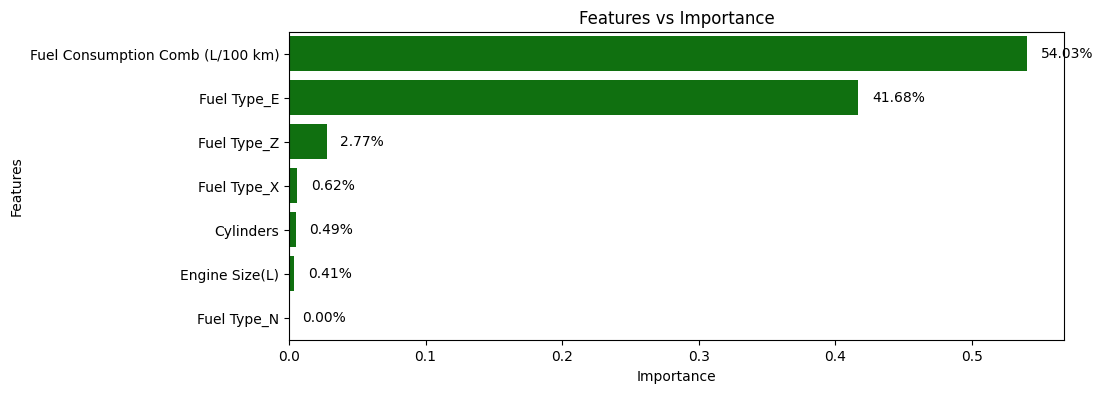

In [65]:
plt.figure(figsize=(10,4))
sns.barplot(y=importance.index, x='Importance',order=importance.sort_values(by='Importance', ascending=False).index,data=importance,color='green')
total = len(importance)
for p in plt.gca().patches:
  width = p.get_width()
  plt.text(width + 0.01, p.get_y() + p.get_height() / 2., f'{width:.2%}', va="center")
plt.ylabel('Features')
plt.title('Features vs Importance')

The Fuel Consumption Comb (L/100 km) feature accounts for 54.03% of the prediction of carbon dioxide emission.It was the most useful feature in the XG Boost model's prediction.

Fuel Type E,Z and X also took a chunk of the usefulness and the least useful was Fuel Type N.

# Conclusion

The data was explored in order to generally understand it, and as much as possible, satisfy all assumptions for regression modeling.

Five model were built using five distinct algorithms and XG Boost Model emerged as the best with 99.56% test rsquared score.

The two most useful features to the XG Boost Model were Fuel Consumption and the Fuel Type, so in predicting for other vehicles these two featurs should be present.

